# Euclid's Algorithm Analysis

This notebook aims to implement and analyze Euclid's Algorithm. The algorithm at its highest level finds the greatest common divisors between two integers.

## Author

Robert Greenslade

## Creating Eucild's Algorithm

In this section, we will implement the function to replicate Euclid's Algorithm in python.

In [26]:
def greatest_common_divisor(a: int, b: int, depth: int = 1) -> (int, int):
    """
    Compute the greatest common divisor of integers a and b.

    Args:
        a (int): The first integer, a
        b (int): The second integer, b
        depth (int): The depth or amount of operations

    Returns:
        tuple[int, int]: The tuple of gcd and number of operations.
    """

    # Base case (When b = 0)
    if b == 0:
        return (a, depth)

    # Recursive step
    a, b = abs(a), abs(b)
    depth += 1
    return greatest_common_divisor(b, a % b, depth)

## Examples

We will now use the above function to show what the result would be in some concrete examples.

In [27]:
# We expect a gcd of 0 and 1 operation here
gcd, operations = greatest_common_divisor(0, 0)
print(f'GCD: {gcd}')
print(f'Operations: {operations}')

GCD: 0
Operations: 1


In [28]:
# We expect a gcd of 5 and 1 operation here
gcd, operations = greatest_common_divisor(10, 5)
print(f'GCD: {gcd}')
print(f'Operations: {operations}')

GCD: 5
Operations: 2


In [29]:
# We expect a gcd of 5 and 2 operations here
gcd, operations = greatest_common_divisor(5, 10)
print(f'GCD: {gcd}')
print(f'Operations: {operations}')

GCD: 5
Operations: 3


In [30]:
# We expect a gcd of 10 and 2 operations here
gcd, operations = greatest_common_divisor(10, 100000000)
print(f'GCD: {gcd}')
print(f'Operations: {operations}')

GCD: 10
Operations: 3


## Algorithm Analysis

We will now use a python library, matplotlib, to display some results to better reflect the effectiveness of this algorithm.

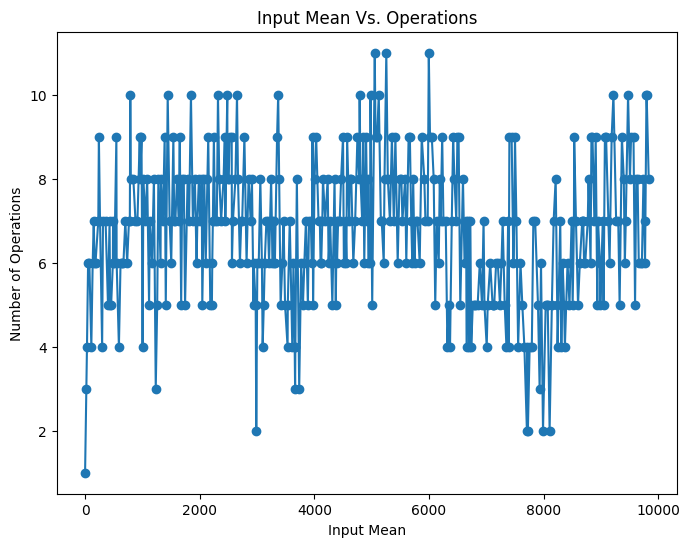

Operation Statistics:
	Mean operations: 6.724675324675324
	Median operations: 7
	Mode operations: 7


In [31]:
import random
import matplotlib.pyplot as plt
import statistics

# The input size, defined as the average of the a and b
N: list[tuple[int, int]] = []

# The list of T(a, b) where T(a, b) denotes the number of operations
T: list[int] = []

# The maximum value a or b can be, setting a limit for the loop
CUTOFF = 9999
a, b = 0, 0
while a < CUTOFF and b < CUTOFF:
    _, operations = greatest_common_divisor(a, b)
    N.append((a + b) / 2)
    T.append(operations)
    a = a + random.randint(1, 50)
    b = b + random.randint(1, 50)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(N, T, marker='o', linestyle='-')

# Set labels
plt.xlabel("Input Mean")
plt.ylabel("Number of Operations")
plt.title("Input Mean Vs. Operations")

# Show the plot
plt.show()

# Print some statistics from the operations
print("Operation Statistics:")
print(f"\tMean operations: {statistics.mean(T)}")
print(f"\tMedian operations: {statistics.median(T)}")
print(f"\tMode operations: {statistics.mode(T)}")

## Observations

The data from above helps us realize how good this algorithm is even with larger values of a and b. While it works well, there are some downsides of this algorithm that the analytics can hide sometimes. Through some additional research, I found that the worst case for a and b are large consecutive Fibonacci numbers. This is because the nth Fibonacci number Fn mod Fn-1 is Fn-2. That means it would take n operations to get to the base case. Observe this below.

Examples:
	First 0 Fibonacci numbers: []
	First 1 Fibonacci numbers: [1]
	First 2 Fibonacci numbers: [1, 1]
	First 10 Fibonacci numbers: [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


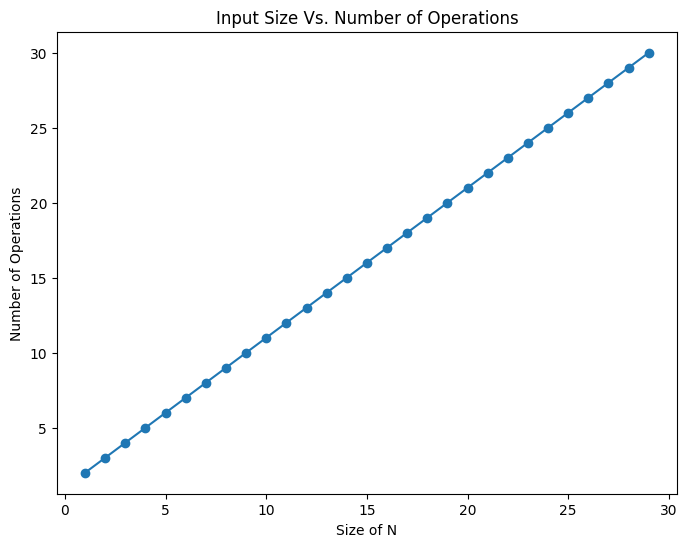

In [32]:
def fib_numbers(n: int) -> list[int, ...]:
    if n <= 0:
        return []
    elif n == 1:
        return [1]
    elif n == 2:
        return [1,1]
    
    fib_list = [1, 1]
    for i in range(2, n):
        fib_list.append(fib_list[-1] + fib_list[-2])
    
    return fib_list

# Examples
print("Examples:")
print(f'\tFirst 0 Fibonacci numbers: {fib_numbers(0)}')
print(f'\tFirst 1 Fibonacci numbers: {fib_numbers(1)}')
print(f'\tFirst 2 Fibonacci numbers: {fib_numbers(2)}')
print(f'\tFirst 10 Fibonacci numbers: {fib_numbers(10)}')

# Observe the linear complexity of Euclid's Algorithm on a = Fn and b = Fn-1
fib_numbers_list = fib_numbers(30)
N = []
operations = []
for i in range(1,len(fib_numbers_list)):
    _, operation = greatest_common_divisor(fib_numbers_list[i-1], fib_numbers_list[i])
    operations.append(operation)
    N.append(i)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(N, operations, marker='o', linestyle='-')

# Set labels
plt.xlabel("Size of N")
plt.ylabel("Number of Operations")
plt.title("Input Size Vs. Number of Operations")

# Show the plot
plt.show()

## Conclusion

The analytics from above confirm that Euclid did invent a rather trivial algorithm that was capable of finding the greatest common divisor in a very quick time regardless of the input size of integers a and b. Because of this, Euclid's Algorithm is still in use today as common mathematical practice. It is always good to not the inputs that Euclid's Algorithm does rather poor at. 

Overall, Euclid did do a great job creating this algorithm, but like everything, it does have some downsides in very specific cases, such as Fibonacci numbers.